# DA Mini Project

- 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석 
- 개요 : 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측 
- 목표 : 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석 
 
target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

In [54]:
import pandas as pd

In [55]:
access_data = pd.read_table('mini.csv',sep=',')

In [56]:
access_data.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [57]:
access_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [58]:
access_data.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


In [75]:
access_data['monthly_active_learning_days_time'] = pd.to_datetime(access_data['monthly_active_learning_days'], format='mixed')
# access_data['access_date_time'] = pd.to_datetime(access_data['access_date'], format=format)
print(type(access_data['monthly_active_learning_days_time'][0]))
access_data.tail(5)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target,monthly_active_learning_days_time
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1,1970-01-01 00:00:00.000000018
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1,1970-01-01 00:00:00.000000009
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1,1970-01-01 00:00:00.000000024
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1,1970-01-01 00:00:00.000000010
9999,e12dcb55,10,5,13.073230,28.120031,3,13,64.811297,4,5,Low,Premium,0,3,0,1970-01-01 00:00:00.000000003


In [80]:
access_data['monthly_active_learning_days_time_weekday'] = access_data['monthly_active_learning_days_time'].dt.day_name()
access_data.tail(30)

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target,monthly_active_learning_days_time,monthly_active_learning_days_time_weekday
9970,62b0c56d,22,4,13.854627,1.324575,10,10,54.233936,5,5,Low,Premium,2,1,0,1970-01-01 00:00:00.000000010,Thursday
9971,f23bf8d4,12,3,14.318070,6.216495,21,16,75.221873,2,5,Low,Basic,0,6,1,1970-01-01 00:00:00.000000021,Thursday
9972,520abce7,19,26,13.540519,25.269974,11,13,74.578855,2,5,Low,Premium,2,1,1,1970-01-01 00:00:00.000000011,Thursday
9973,6f9b02da,11,7,9.918299,12.752979,4,12,67.321946,4,2,High,Basic,3,1,1,1970-01-01 00:00:00.000000004,Thursday
9974,fe930c63,13,9,14.454459,28.600897,10,8,78.982978,5,1,High,Basic,0,1,1,1970-01-01 00:00:00.000000010,Thursday
9975,1c7e79c3,17,23,14.429093,15.204629,3,8,87.170742,2,2,Low,Basic,0,0,0,1970-01-01 00:00:00.000000003,Thursday
9976,2602b60e,23,4,15.201025,0.058419,6,10,70.459241,4,5,Low,Premium,4,7,1,1970-01-01 00:00:00.000000006,Thursday
9977,1c7bf74c,23,5,18.825849,20.431243,8,11,67.168726,3,4,Low,Premium,3,4,1,1970-01-01 00:00:00.000000008,Thursday
9978,80738d39,19,11,16.289195,220.692210,3,9,64.394153,5,5,Medium,Premium,2,1,1,1970-01-01 00:00:00.000000003,Thursday
9979,bea1533c,3,16,14.852442,19.765124,19,11,58.643467,2,5,Medium,Premium,0,5,1,1970-01-01 00:00:00.000000019,Thursday


## 이용 행태 
구독 타입별 사용자들의 행동 패턴 분석을 위해 사용자들을 구독 타입별로 나눠보자.

In [18]:
subscription_types = ['Basic', 'Premium']
subscriptiondata = access_data.groupby('subscription_type')['user_id'].count()
subscription_types = ['Basic', 'Premium']
subscriptiondata = subscriptiondata.agg(subscription_types)
subscriptiondata

Basic      5979
Premium    4021
Name: user_id, dtype: int64

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [20]:
# 한글 및 특정 문자 깨짐 문제 해결
import koreanize_matplotlib # 시본의 한글 깨짐은 해결못하지만, - 깨짐 해결

from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)
# plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

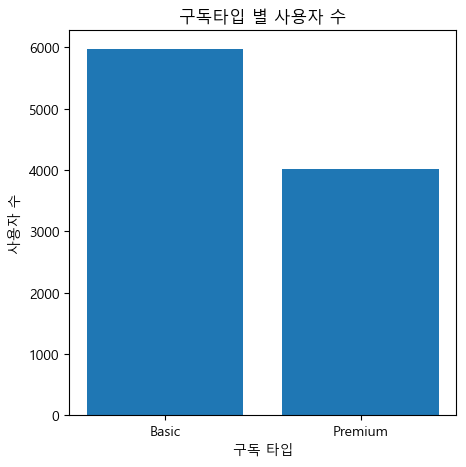

In [21]:
# 구독 타입 별 사용자 수
#그래프 사이즈
plt.figure(figsize=(5,5))

#그래프 x축 y축
plt.bar(subscriptiondata.index, subscriptiondata.values)

#그래프 명
plt.title('구독타입 별 사용자 수')

#그래프 x축 레이블
plt.xlabel('구독 타입')

#그래프 y축 레이블
plt.ylabel('사용자 수')

#그래프 출력
plt.show()

## 학습 습관 1(평균 학습 일수) 
구독 타입별 차이점을 찾기 위해 먼저 구독 타입별 학습 일수를 알아보자.

## 구독 타입별 월간 평균 활동적인 학습 일수

In [24]:
subscription_types_by_active_learning_days=access_data.groupby('subscription_type')['monthly_active_learning_days'].sum() 
subscription_types_by_active_learning_days

subscription_type
Basic      75592
Premium    49862
Name: monthly_active_learning_days, dtype: int64

In [25]:
average = subscription_types_by_active_learning_days/subscriptiondata
average

subscription_type
Basic      12.642917
Premium    12.400398
dtype: float64

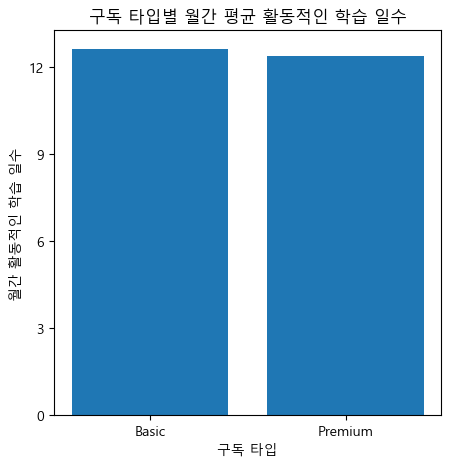

In [26]:
plt.figure(figsize=(5,5)) 
plt.yticks([0, 3,6,9,12]) 
plt.bar(average.index, average)
#그래프의 제목
#타이틀과 그래프와의 간격은 pad= 수치 로 나타내어요!
plt.title('구독 타입별 월간 평균 활동적인 학습 일수')

#그래프의 x축 라벨 이름
#labelpad 파라미터는 축 레이블의 여백을 지정합니다.
plt.xlabel('구독 타입')

#그래프의 y축 라벨 이름
plt.ylabel('월간 활동적인 학습 일수')

#그래프를 화면에 나타나도록 합니다.
plt.show()

## 학습 습관 2(평균 완료 코스 수) 
학습 일수가 비슷했다면 구독 타입별 완료 총 코스 수는 어떻게 될까?

## 구독 타입별 평균 완료 코스 수

In [27]:
subscription_types_by_completed_courses=access_data.groupby('subscription_type')['total_completed_courses'].sum() 
subscription_types_by_completed_courses

subscription_type
Basic      65863
Premium    56412
Name: total_completed_courses, dtype: int64

In [28]:
average2 = subscription_types_by_completed_courses/subscriptiondata
average2

subscription_type
Basic      11.015722
Premium    14.029346
dtype: float64

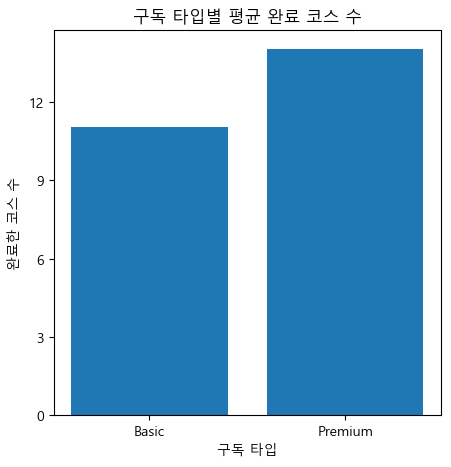

In [29]:
plt.figure(figsize=(5,5)) 
plt.yticks([0,3,6,9,12,15])  
plt.bar(average2.index, average2)
#그래프의 제목

plt.title('구독 타입별 평균 완료 코스 수')

#그래프의 x축 라벨 이름

plt.xlabel('구독 타입')

#그래프의 y축 라벨 이름
plt.ylabel('완료한 코스 수')


plt.show()

## 구독 타입별 선호 난이도 
구독 타입별 완료 코스 수의 차이가 나는데 그 이유는 무엇일까? 
 
혹시 학습 난이도가 높았던 것일까?  
 
우선 구독 타입별 선호 난이도를 알아보자.

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import koreanize_matplotlib 

In [84]:
preferred_difficulty_level = ['Low', 'Medium', 'High']
leveldata = access_data.groupby('preferred_difficulty_level')['user_id'].count()
preferred_difficulty_level = ['Low', 'Medium', 'High']
leveldata = leveldata.agg(preferred_difficulty_level)
leveldata

Low       4992
Medium    3008
High      2000
Name: user_id, dtype: int64

In [34]:
subscription_types_by_preferred_difficulty_level=access_data.groupby(['subscription_type','preferred_difficulty_level'])['user_id'].count() 
subscription_types_by_preferred_difficulty_level

subscription_type  preferred_difficulty_level
Basic              High                          1228
                   Low                           3009
                   Medium                        1742
Premium            High                           772
                   Low                           1983
                   Medium                        1266
Name: user_id, dtype: int64

In [36]:
subscription_types_by_preferred_difficulty_level.info()

<class 'pandas.core.series.Series'>
MultiIndex: 6 entries, ('Basic', 'High') to ('Premium', 'Medium')
Series name: user_id
Non-Null Count  Dtype
--------------  -----
6 non-null      int64
dtypes: int64(1)
memory usage: 349.0+ bytes


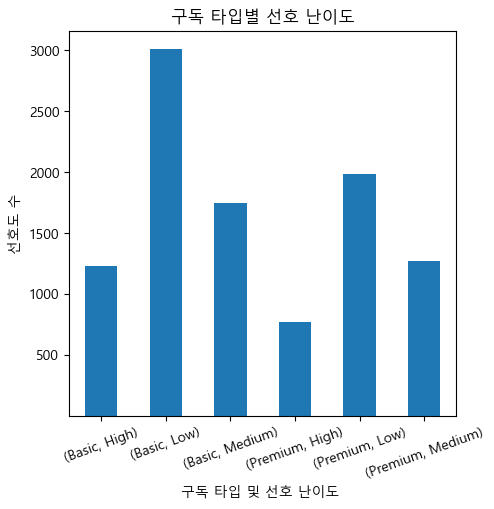

In [208]:
plt.figure(figsize=(5,5)) 
plt.yticks([500,1000,1500,2000,2500,3000]) 

subscription_types_by_preferred_difficulty_level[:6].plot.bar(rot=20)
plt.title("구독 타입별 선호 난이도")
plt.xlabel("구독 타입 및 선호 난이도 ")
plt.ylabel("선호도 수")

plt.show()

## 구독 타입별 각 학습 세션 평균 소요 시간  
실제 학습의 난이도는 어떠할까? 
 
 각 학습 세션 평균 소요 시간과 중단된 학습 세션 수로 예측해 보자.


In [63]:
subscription_types_by_average_time_per_learning_session=access_data.groupby('subscription_type')['average_time_per_learning_session'].sum() 

subscription_types_by_average_time_per_learning_session

subscription_type
Basic      289393.592808
Premium    259783.611753
Name: average_time_per_learning_session, dtype: float64

In [64]:
average5 = subscription_types_by_average_time_per_learning_session/subscriptiondata
average5

subscription_type
Basic      48.401671
Premium    64.606718
dtype: float64

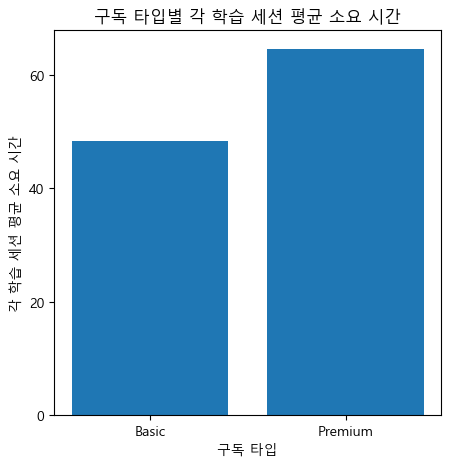

In [65]:
plt.figure(figsize=(5,5)) 
plt.yticks([0,20,40,60,80,100])  
plt.bar(average5.index, average5)
#그래프의 제목

plt.title('구독 타입별 각 학습 세션 평균 소요 시간')

#그래프의 x축 라벨 이름

plt.xlabel('구독 타입')

#그래프의 y축 라벨 이름
plt.ylabel('각 학습 세션 평균 소요 시간')


plt.show()

## 구독 타입별 중단된 학습 평균 세션 수 

In [91]:
subscription_types_by_abandoned_learning_sessions=access_data.groupby('subscription_type')['abandoned_learning_sessions'].sum() 
subscription_types_by_abandoned_learning_sessions

subscription_type
Basic      18212
Premium    12224
Name: abandoned_learning_sessions, dtype: int64

In [93]:
average6 = subscription_types_by_abandoned_learning_sessions/subscriptiondata
average6

subscription_type
Basic      3.045994
Premium    3.040040
dtype: float64

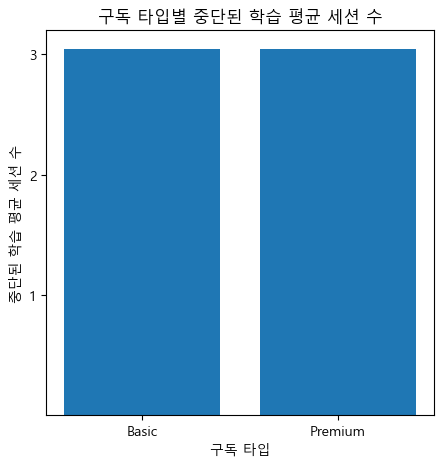

In [68]:
plt.figure(figsize=(5,5)) 
plt.yticks([1,2,3,4,5])  
plt.bar(average6.index, average6)
#그래프의 제목

plt.title('구독 타입별 중단된 학습 평균 세션 수')

#그래프의 x축 라벨 이름

plt.xlabel('구독 타입')

#그래프의 y축 라벨 이름
plt.ylabel('중단된 학습 평균 세션 수')


plt.show()

## 구독 타입별 각 학습 세션에 소요된 평균 시간 대비 중단된 학습 세션 수 
수정 필요

In [96]:
subscription_types_by_abls_als=access_data.groupby('subscription_type')
subscription_types_by_abls_als

TypeError: unsupported operand type(s) for /: 'list' and 'list'

In [101]:
access_data.groupby('subscription_type')[(average_time_per_learning_session)/(abandoned_learning_sessions)] 

NameError: name 'average_time_per_learning_session' is not defined

## 구독 타입 별 평균 커뮤니티 참여도

In [203]:
subscription_types_by_community_engagement_level=access_data.groupby(['subscription_type','community_engagement_level'])['user_id'].count() 
subscription_types_by_community_engagement_level

subscription_type  community_engagement_level
Basic              1                              559
                   2                             1219
                   3                             1158
                   4                             1237
                   5                             1806
Premium            3                              430
                   4                              833
                   5                             2758
Name: user_id, dtype: int64

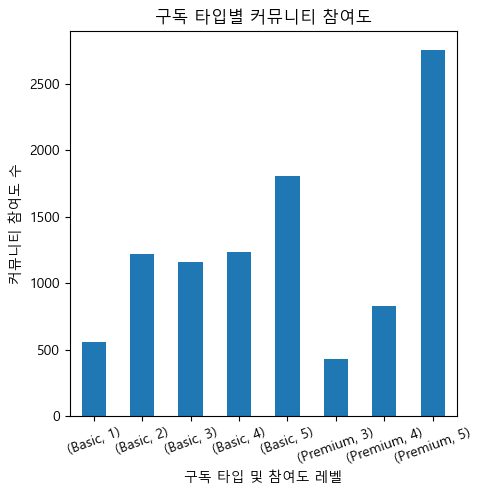

In [207]:
plt.figure(figsize=(5,5)) 

subscription_types_by_community_engagement_level[:10].plot.bar(rot=20)
plt.title("구독 타입별 커뮤니티 참여도")
plt.xlabel("구독 타입 및 참여도 레벨")
plt.ylabel("커뮤니티 참여도 수")
plot
plt.show()

## 구독 타입 별 결제 패턴

In [179]:
subscription_type_by_payment_pattern[:8]

subscription_type  payment_pattern
Basic              0                  763
                   1                  722
                   2                  697
                   3                  714
                   4                  764
                   5                  772
                   6                  766
                   7                  781
Name: user_id, dtype: int64

In [184]:
subscription_type_by_payment_pattern[:8].max() 
# 7 : 3개월 모두 결제함이 가장 많음

781

In [170]:
subscription_type_by_payment_pattern[:8].min() 
# 2: 가운데 달에만 결제함

697

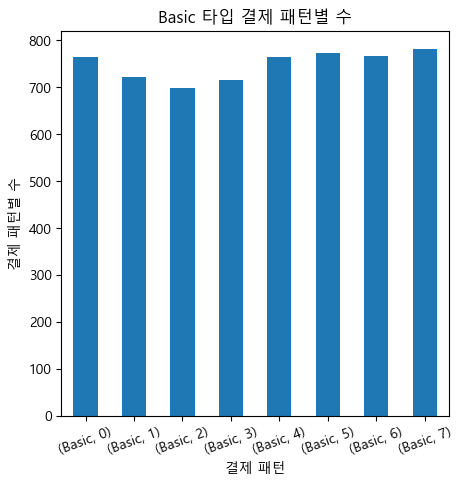

In [209]:
plt.figure(figsize=(5,5)) 
subscription_type_by_payment_pattern[:8].plot.bar(rot=20) 
plt.title("Basic 타입 결제 패턴별 수")
plt.xlabel("결제 패턴")
plt.ylabel("결제 패턴별 수")
plt.show()

In [190]:
subscription_type_by_payment_pattern[8:16]

subscription_type  payment_pattern
Premium            0                  512
                   1                  563
                   2                  509
                   3                  516
                   4                  450
                   5                  466
                   6                  502
                   7                  503
Name: user_id, dtype: int64

In [191]:
subscription_type_by_payment_pattern[8:16].max()
# 1: 마지막 달에만 결제함이 가장 많음

563

In [192]:
subscription_type_by_payment_pattern[8:16].min() 
# 4 : 첫 달에만 결제함이 가장 적음

450

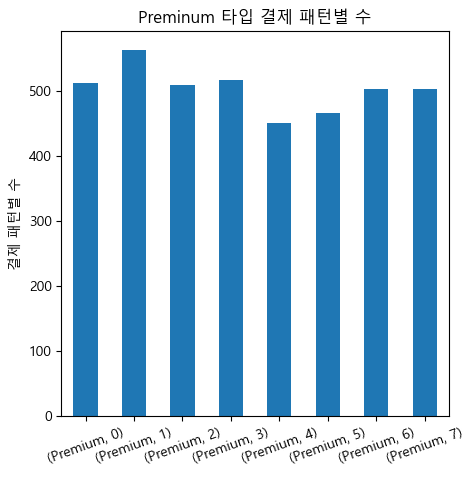

In [189]:
plt.figure(figsize=(5,5)) 
subscription_type_by_payment_pattern[8:16].plot.bar(rot=20)
plt.title("Preminum 타입 결제 패턴별 수")
plt.xlabel(" ")
plt.ylabel("결제 패턴별 수")

plt.show()

# 종합

- basic 구독 타입의 사용자가 많은 편 
- 구독 타입별 월간 평균 활동 학습 일수는 basic이 조금 더 많은 편이나 크게 차이나지 않음  
- 구독 타입별 평균 완료 코스 수는 premium이 많은 편 
- 구독 타입별 선호 난이도는 Low 
- 구독 타입별 각 학습 세션 평균 소요 시간은 premium이 높음 
- 구독 타입별 중단된 학습 평균 세션 수 비슷 
- 구독 타입별 각 학습 세션에 소요된 평균 시간 대비 중단된 학습 세션 수는 basic이 높은 편 
 - 구독 타입 별 평균 커뮤니티 참여도는 가장 높은 참여도 레벨을 보았을 때는 preminum이 높지만, 전체적으로 보았을 때는 basic의 참여도가 높은 편 
 - 구독 타입별 결제 타입을 보았을 때 basic은 2-3개월동안 서비스를 이용하며 결제하는 경우가 높았으며, premium은 1-2개월 서비스 이용 후 결제하는 경우가 높았음